## Scikit-Learn POC using Decision Tree Classifier:
References: <br>
1) https://www.semanticscholar.org/paper/Machine-Learning-Techniques-for-Distracted-Driver-Feng/b76f61c4143b483f2bdae3d82bdcb114ffefe5a1

2) https://github.com/jowe41/cs229/blob/master/NaiveBayes_DecisionTree.ipynb


## Mount the google drive to access the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Extracting the dataset by unzipping the zipped folder

In [2]:
!unzip -uq "/content/drive/MyDrive/SPM/models/state-farm-distracted-driver-detection.zip" -d "/content/state-farm-dataset"

## Installing the graphviz library to plot the decision tree 

In [3]:
!pip install graphviz

## Importing the required libraries


In [4]:
import random
import pandas as pd
import numpy as np
import os
import glob
import cv2

## Using openCV library to read the images converting each image to an array of pixels


In [5]:
def resize(path, img_height, img_width):
    img = cv2.imread(path)
    resized = cv2.resize(img, (img_height, img_width))
    return resized

## Creating a function to get the data from the train folder and resizing every image to 64x64 from 640x480 pixels and returning as Training dataset - X_train and y_train 

In [6]:
def get_data():
    train_dir = "/content/state-farm-dataset/imgs/train"
    X_train = []
    y_train = []
    
    for j in range(10):
        print('Load folder c{}'.format(j))
        path = os.path.join(train_dir, 'c' + str(j), '*.jpg')
        files = glob.glob(path)
        for fl in files:
            flbase = os.path.basename(fl)
            img = resize(fl, 64, 64)
            X_train.append(img)
            y_train.append(j)
    return X_train, y_train

## Implementing the function get_data() to get all the images from the training folder


In [7]:
X_train, y = get_data()

Load folder c0
Load folder c1
Load folder c2
Load folder c3
Load folder c4
Load folder c5
Load folder c6
Load folder c7
Load folder c8
Load folder c9


In [8]:
type(X_train)

list

In [27]:
len(X_train)

17939

## Converting the list of pixels vectors to an np array for freedom of data manipulation


In [9]:
X_train = np.asarray(X_train)
y = np.asarray(y)
print(X_train.shape)

(22424, 64, 64, 3)


In [10]:
print(X_train[1])

[[[ 27  36  27]
  [ 26  35  26]
  [ 28  36  29]
  ...
  [219 239 175]
  [192 225 179]
  [ 77 109  79]]

 [[ 20  27  24]
  [ 25  32  28]
  [ 27  35  28]
  ...
  [226 226 158]
  [220 228 172]
  [216 245 174]]

 [[ 19  29  23]
  [ 24  34  28]
  [ 25  36  28]
  ...
  [216 215 141]
  [225 223 153]
  [220 231 159]]

 ...

 [[  1   6   5]
  [  1   6   5]
  [  1   6   5]
  ...
  [  5   7   8]
  [  2   7   6]
  [  4   9   8]]

 [[  1   6   5]
  [  1   6   5]
  [  1   6   5]
  ...
  [  3   7   8]
  [  5   9  10]
  [  7  11  12]]

 [[  1   6   5]
  [  1   6   5]
  [  1   6   5]
  ...
  [  3   7   8]
  [  3   7   8]
  [  4   8   9]]]


In [11]:
np.reshape(X_train[1],(X_train[1].shape[0],-1))   #[(22K,64,64,3),(22K,-1)]

array([[ 27,  36,  27, ...,  77, 109,  79],
       [ 20,  27,  24, ..., 216, 245, 174],
       [ 19,  29,  23, ..., 220, 231, 159],
       ...,
       [  1,   6,   5, ...,   4,   9,   8],
       [  1,   6,   5, ...,   7,  11,  12],
       [  1,   6,   5, ...,   4,   8,   9]], dtype=uint8)

In [12]:
print(y[1].reshape(-1,1))

[[0]]


## Reshaping the X_train and y_train to get rows into columns as features and splitting the dataset into training and test datasets

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

X_train = np.reshape(X_train, (X_train.shape[0], -1))
y_train = y.reshape(-1, 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=42)
print('Training data shape: ', X_train.shape)
print('Train Label shape:', y_train.shape)

Training data shape:  (17939, 12288)
Train Label shape: (17939,)


## Importing Scikit-Learn's inbuilt DecisionTreeClassifier for implementing the model. We are keeping the depth as None which means the tree will classify the nodes till they are completely classfied (will get only one class). <br> We are using KFold cross validation which splits the training dataset into random set of test dataset every iteration. This means your test dataset will change on every run (here its 5, that means the training dataset will be using 5 different sets of tests and averaging the output to get the mean cross validation accuracy) 

In [14]:
from sklearn.tree import DecisionTreeClassifier
import time
tree_ = DecisionTreeClassifier()
print(tree_)

#start = time.time()
kfold = KFold(n_splits=5) #, random_state=42
tree_results = cross_val_score(tree_, X_train, y_train, cv=kfold, scoring="accuracy")
#end = time.time()
#val_time = end-start

result = "Mean Accuracy: %f" % (tree_results.mean())
print(result)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Mean Accuracy: 0.848374


## The cross validation accuracy helps in understanding how the decision tree would respond to new data and helps in deciding if its the right way to go forward. Usually decision trees have a tendency to overfit, so cross validation step helps us in understanding if a good accuracy can be acheived by creating a scenario where the classifier is exposed to a small but new test dataset every iteration and observed

In [29]:
len(X_val)

4485

In [37]:
start = time.time()
model = tree_.fit(X_train,y_train)
end = time.time()
eval_time = end-start # seconds

In [ ]:
y_pred = model.predict(X_val)

In [38]:
print(eval_time)

289.60034132003784


In [16]:
#print(1614975070.7917788-1614975070.8973644)
#eval_time  ## milliseconds
#eval_time  #~~ 1.78 mins
#val_time ## ~~ 17 mins

In [17]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

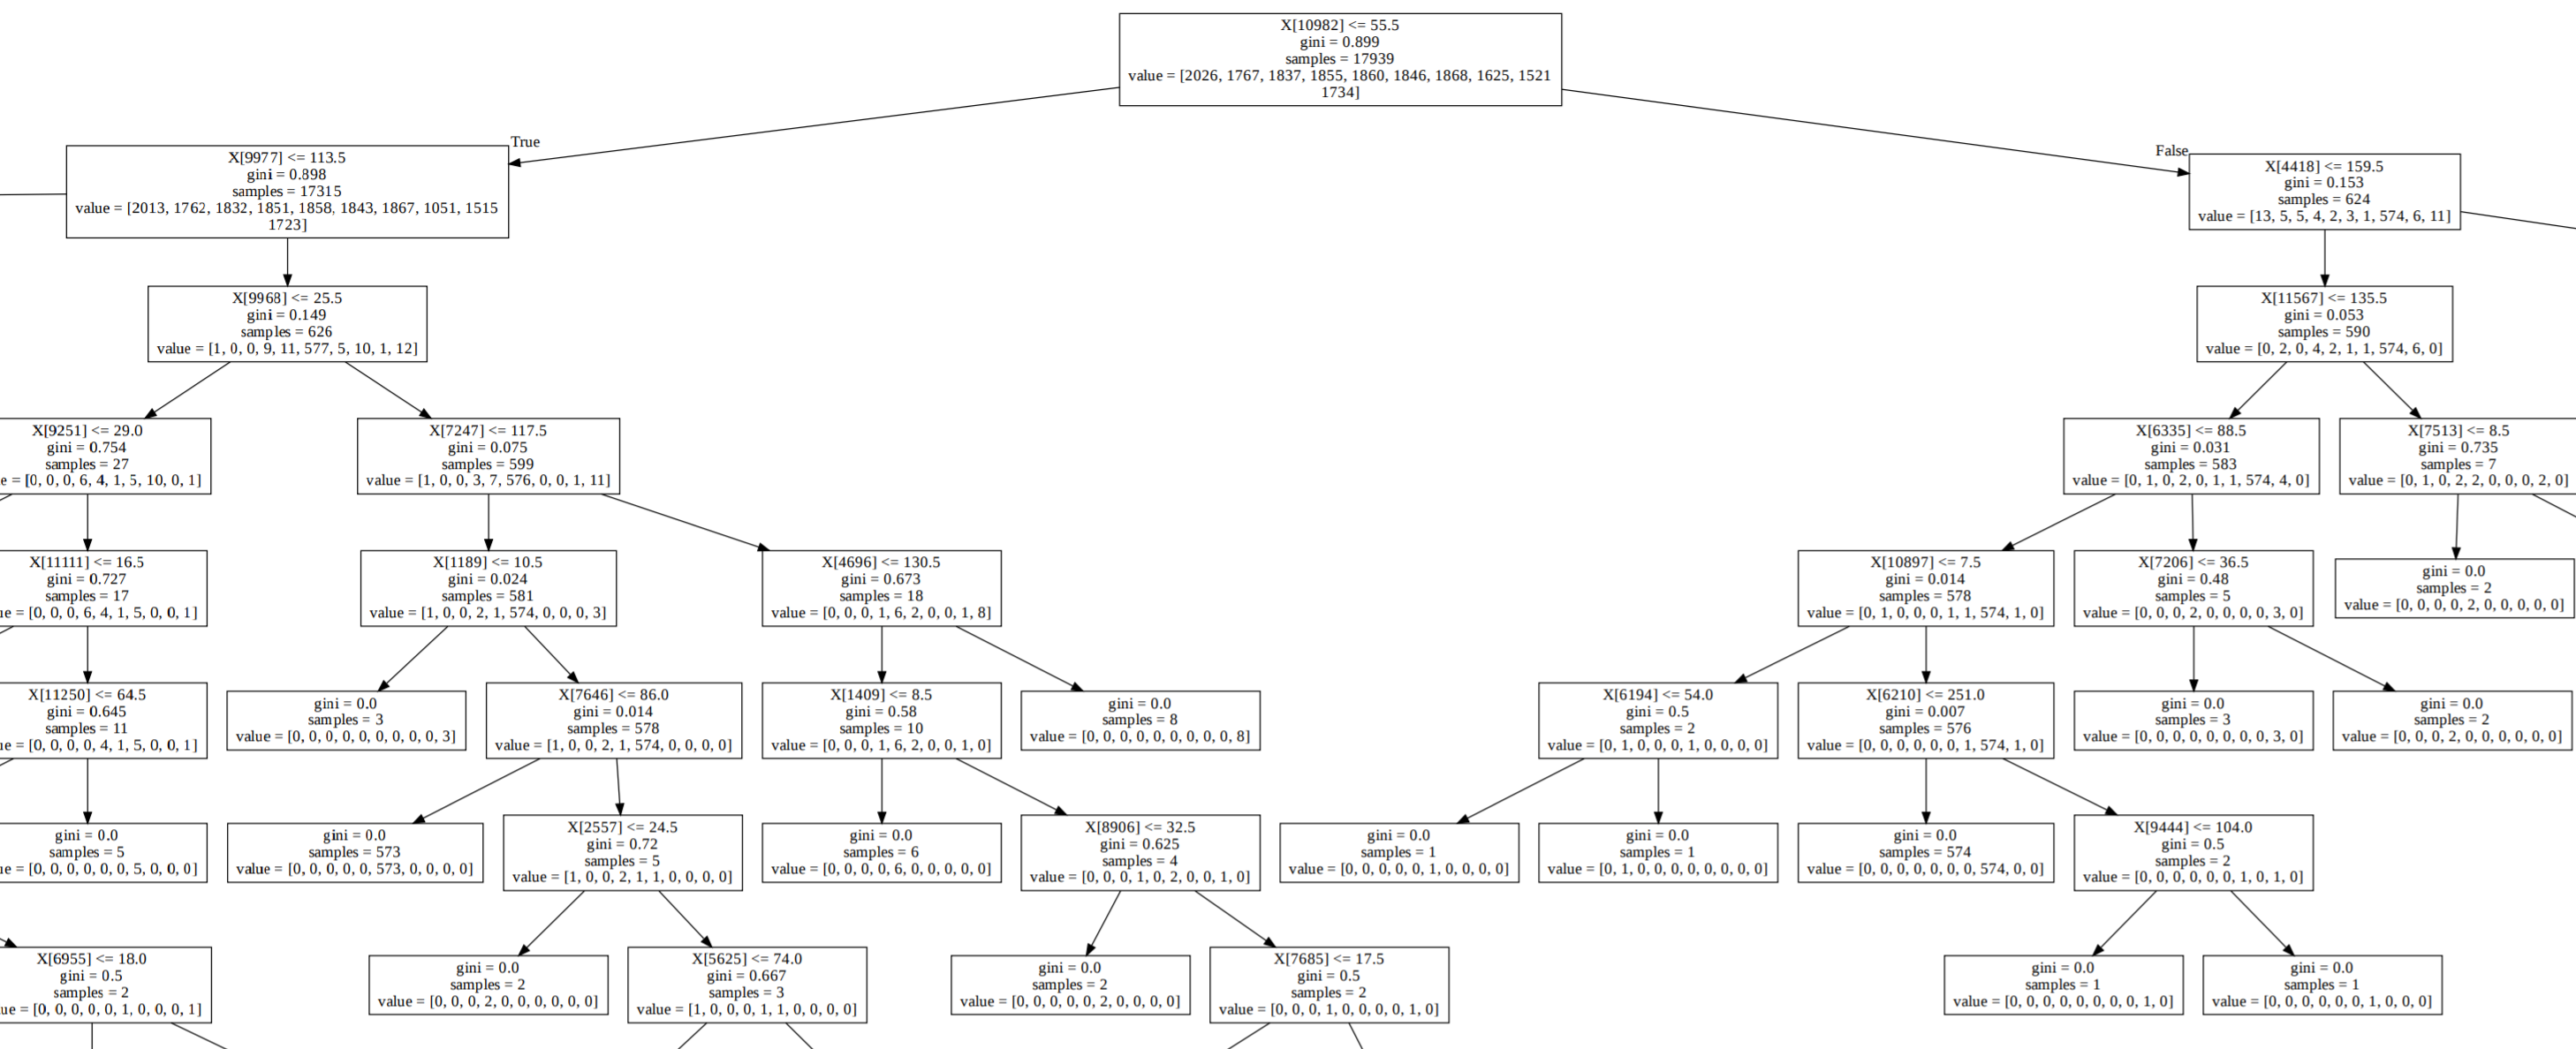

## Getting the confusion matrix and the classification report on the decision tree classifier. Since it is multi class classificaiton - the weighted avg would be a good performance metric to take into consideration as unlike binary classification where ROC-AUC is a good decision metric, it is limiting in this case as the ROC curve would be an 9-dimensional plot. I am not sure how to implement that. 


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[404   8   7  13   9   3   5   4   3   7]
 [  8 436  10   7   2   1  13   7   9   7]
 [  5   5 424   6   4   4  13   8   6   5]
 [ 17   8   1 426  21   1   4   3   6   4]
 [ 12   4   4  17 403   3   7   5   3   8]
 [  4   4   2   5   2 438   1   5   2   3]
 [  3  11  15   2   7   1 393   8  11   6]
 [  2   8  11   1   4   1  15 320  11   4]
 [  8   6  24   2   5   4  12   8 301  20]
 [ 14   7   8  10  13   5   2   9   8 319]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       463
           1       0.88      0.87      0.87       500
           2       0.84      0.88      0.86       480
           3       0.87      0.87      0.87       491
           4       0.86      0.86      0.86       466
           5       0.95      0.94      0.94       466
           6       0.85      0.86      0.85       457
           7       0.85      0.85      0.85       377
           8       0.84      0.77      0.80       390
           9       0.83     

In [19]:
accuracy_score(y_val,y_pred)

0.8615384615384616

In [20]:
class_report = classification_report(y_val, y_pred)

In [21]:
print(class_report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       463
           1       0.88      0.87      0.87       500
           2       0.84      0.88      0.86       480
           3       0.87      0.87      0.87       491
           4       0.86      0.86      0.86       466
           5       0.95      0.94      0.94       466
           6       0.85      0.86      0.85       457
           7       0.85      0.85      0.85       377
           8       0.84      0.77      0.80       390
           9       0.83      0.81      0.82       395

    accuracy                           0.86      4485
   macro avg       0.86      0.86      0.86      4485
weighted avg       0.86      0.86      0.86      4485



In [22]:
df_cm = pd.DataFrame(
    confusion_matrix(y_val, y_pred),
    columns=['Pred c0-safe Driving', 'Pred c1-texting right', 'Pred c2-talking on the phone right',\
             'Pred c3-texting left','Pred c4-talking on the phone left','Pred c5-operating the radio',\
             'Pred c6-drinking', 'Pred c7-reaching behind','Pred c8-hair and makeup','Pred c9-talking to passenger'],
    index=['True c0-safe Driving', 'True c1-texting right', 'True c2-talking on the phone right',\
             'True c3-texting left','True c4-talking on the phone left','True c5-operating the radio',\
             'True c6-drinking', 'True c7-reaching behind','True c8-hair and makeup','True c9-talking to passenger']
)

In [23]:
df_cm.to_csv('confusion_matrix_decision_tree.csv')

## Plotting the confusion matrix

[[404   8   7  13   9   3   5   4   3   7]
 [  8 436  10   7   2   1  13   7   9   7]
 [  5   5 424   6   4   4  13   8   6   5]
 [ 17   8   1 426  21   1   4   3   6   4]
 [ 12   4   4  17 403   3   7   5   3   8]
 [  4   4   2   5   2 438   1   5   2   3]
 [  3  11  15   2   7   1 393   8  11   6]
 [  2   8  11   1   4   1  15 320  11   4]
 [  8   6  24   2   5   4  12   8 301  20]
 [ 14   7   8  10  13   5   2   9   8 319]]


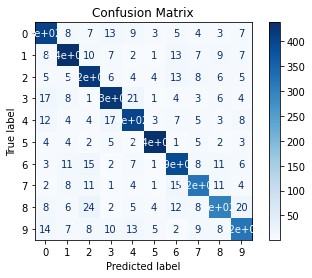

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(model, X_val, y_val,
                                 display_labels=np.unique(y_train),
                                 cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')

print(disp.confusion_matrix)

In [26]:
X_train

array([[42, 50, 40, ...,  7,  9, 10],
       [16, 22, 21, ...,  6,  8,  8],
       [72, 89, 71, ..., 13, 15, 16],
       ...,
       [43, 53, 37, ..., 13, 14, 12],
       [26, 34, 27, ...,  4,  8,  9],
       [40, 50, 37, ...,  6, 10, 11]], dtype=uint8)

## Predicting unseen data

In [ ]:
def resize(path, img_height, img_width):
    img = cv2.imread(path)
    resized = cv2.resize(img, (img_height, img_width))
    return resized

In [32]:
def get_unseen_data():
    test_dir = "/content/state-farm-dataset/imgs/test"
    X_new = []
    #y_train = []
    
    #for j in range(10):
    #print('Load folder c{}'.format(j))
    path = os.path.join(test_dir,'*.jpg')
    files = glob.glob(path)
    for fl in files:
        flbase = os.path.basename(fl)
        img = resize(fl, 64, 64)
        X_new.append(img)
        #y_train.append(j)
    return X_new

In [33]:
X_new = get_unseen_data()

In [35]:
len(X_new)

79726